> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb Movies 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This Dataset contains information about more than 10000 movies Collected from different countries, it include information like revenue, cast, genres, release date, ...etc.
> Then let us explore this dataset and find answers to this questions:

## Questions:
<ol>
    <li>Which Genre Has The Highest Release Of Movies? </li>
    <li>what the Most Frequent Actor?</li>
    <!--<li> What kinds of properties are associated with movies that have high revenues?</li-->
    <li> Which movies with hightest and lowest revenue?</li>
    <li> which Movie with shorest and longest runtime? </li>
</ol>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Let's see number of rows and columns in this dataset
df.shape

(10866, 21)

In [5]:
#Let's see number of missing items and data type of each column in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#Let's see number of unique value in each columns in this dataset
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

In [8]:
#let's delete some unnecessary columns : home page, id, imdb_id, overview, revenue, budget(i will delete 
# revenue and budget because i will work with last budget_adj and revenue_adj)
df.drop(columns=["id","imdb_id","homepage","overview","budget","revenue"],inplace=True)
df.head()

,popularity,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
#i will fix release date and make its type "Date" not string
##a-> i have prolblem that year not 4 digits it read it just last 2 digits onlr
df['release_date'].head()   

0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
Name: release_date, dtype: object

In [10]:
### and i fixed it. by adding 20 ... when i checked dataset, i didn't find any movie released before 20 centary.
df['release_date']=df['release_date'].apply(lambda x:x.rstrip().split("/")[1]+"/"+x.rstrip().split("/")[0]+"/"+"20"+x.rstrip().split("/")[2])
df['release_date'].head()

0      9/6/2015
1     13/5/2015
2     18/3/2015
3    15/12/2015
4      1/4/2015
Name: release_date, dtype: object

In [11]:
### now i will make it date.
df['release_date']=pd.to_datetime(df["release_date"])
df['release_date'].head()

0   2015-09-06
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-01-04
Name: release_date, dtype: datetime64[ns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 1.2+ MB


In [13]:
#lets see if revenue and budget have zero value(NaN)
print(str(len(df[df["budget_adj"]==0]))+" "+str(len(df[df["revenue_adj"]==0])))

5696 6016


In [14]:
# as we see there is alot of movies has budget_adj and/or revenue_adj equil zero (NAN)
# so i will replace this zeros to mean of budget_adj and mean of revenue_adj
#df[df["budget_adj"]==0]=df["budget_adj"].mean()
#df[df["revenue_adj"]==0]=df["revenue_adj"].mean()
df["budget_adj"].replace({0: df["budget_adj"].mean()}, inplace=True)
df["revenue_adj"].replace({0: df["revenue_adj"].mean()}, inplace=True)

In [15]:
# Lets confirm
print(str(len(df[df["budget_adj"]==0]))+" "+str(len(df[df["revenue_adj"]==0])))

0 0


In [16]:
df["budget_adj"]

0        1.379999e+08
1        1.379999e+08
2        1.012000e+08
3        1.839999e+08
4        1.747999e+08
5        1.241999e+08
6        1.425999e+08
7        9.935996e+07
8        6.807997e+07
9        1.609999e+08
10       2.253999e+08
11       1.619199e+08
12       1.379999e+07
13       8.095996e+07
14       2.575999e+08
15       4.047998e+07
16       4.415998e+07
17       1.195999e+08
18       8.739996e+07
19       1.471999e+08
20       1.747999e+08
21       2.759999e+07
22       1.012000e+08
23       3.679998e+07
24       2.575999e+07
25       1.379999e+08
26       6.255997e+07
27       7.451997e+07
28       1.839999e+07
29       5.611998e+07
             ...     
10836    1.755104e+07
10837    1.755104e+07
10838    1.755104e+07
10839    1.755104e+07
10840    1.755104e+07
10841    5.038511e+05
10842    1.755104e+07
10843    1.755104e+07
10844    1.755104e+07
10845    1.755104e+07
10846    1.755104e+07
10847    1.755104e+07
10848    3.436265e+07
10849    1.755104e+07
10850    1

In [17]:
# now let's Drop the missed values by Dataset
df.dropna(subset =["cast","director","genres","production_companies"],inplace=True)

In [18]:
# now lets confirm
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9773 non-null float64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
tagline                 7636 non-null object
keywords                8667 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null datetime64[ns]
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1:Which Genre Has The Highest Release Of Movies?

In [19]:
def count_of(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

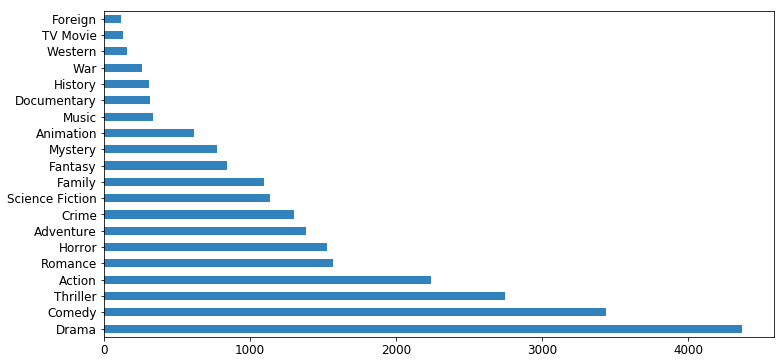

In [20]:
count_of('genres').plot(kind= 'barh',figsize = (12,6),fontsize=12,colormap='tab20c');


>According to plot The drama genre has the highest release of movies followed by comedy and thriller

### Research Question 2  What the Most Frequent Actor?

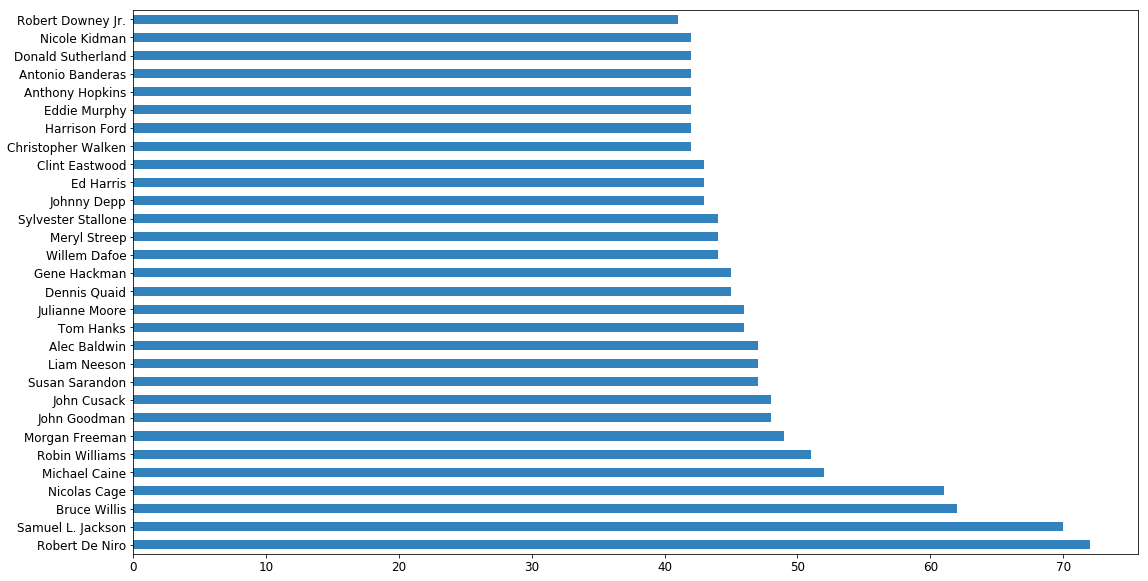

In [21]:
## we will use count_of function to get/know number of movies which each actor did
count_of('cast').iloc[:30].plot(kind= 'barh',figsize = (18,10),fontsize=12,colormap='tab20c');

>According to plot Robert De Niro has the Most Frequent followed by Samouel L.Jackson and Bruce

### Research Question 3 Which movies with hightest and lowest revenue?

In [24]:
Movies_revenue = df.iloc[:,np.r_[1,14]]


51364363.25325099       5022
Hamlet                     4
Carrie                     3
Julia                      3
Oliver Twist               3
Annie                      3
Hercules                   3
Shelter                    3
A Christmas Carol          3
Life                       3
The Three Musketeers       3
Frankenstein               3
TEKKEN                     2
The Bling Ring             2
Hope Springs               2
Man of the House           2
14389144.829140803         2
Maniac                     2
Wuthering Heights          2
Vendetta                   2
dtype: int64

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])